# Arreglos con numpy. Parte II

## Programación para Análisis de Datos 

### Mtra. Gisel Hernández Chávez


### Contenido

13. Características de numpy que lo hacen potente

        13.1 Reglas detalladas de transmisión
        13.2 Transmisión, propagación o estiramiento de un escalar
        13.3 Suma dos elementos en un arreglo de una dimensión
14. Multiplicación de matrices en numpy usando el operador @

        14.1 Multilicación de arreglo por un escalar
        14.2 Multilicación de arreglo por otro arreglo
15. Producto interior (inner product)

        15.1 Producto punto (dot product)
    



In [77]:
import numpy as np
from datetime import datetime

In [78]:
# Para obtener múltiples salidas de una celda
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 13.Características de numpy que lo hacen potente

+ __Vectorización__ 

La vectorización describe la ausencia de cualquier bucle explícito, indexación, etc. en el código. Sucede sólo "detrás de escena" en código C optimizado y precompilado. El código vectorizado tiene muchas ventajas:

    + Es más conciso y más fácil de leer
    + Tiene menos líneas de código por lo que generalmente significa menos errores
    + El código se parece más a la notación matemática estándar (lo que facilita codificar correctamente las construcciones matemáticas)
    + Da como resultado un código más "Pythonico". Sin la vectorización, nuestro código estaría plagado de bucles for ineficientes y difíciles de leer.

+ __Transmisión (propagación) (*broadcasting*)__.

El término transmisión describe cómo numpy trata los arreglos con diferentes formas durante las operaciones aritméticas. Sujeto a ciertas restricciones, __el arreglo más pequeño se "transmite" a través del arreglo más grande para que tengan formas compatibles__. La transmisión proporciona un medio para vectorizar las operaciones del arreglo para que el bucle se produzca en C en lugar de Python.

__"Broadcasting"__ es el término utilizado para describir el comportamiento implícito elemento por elemento de las operaciones.

En general, en NumPy todas las operaciones, no solo las operaciones aritméticas, sino también las lógicas, bit a bit, funcionales, etc., se comportan de esta manera implícita elemento por elemento, es decir, transmiten.

En el ejemplo siguiente, a y b podrían ser arreglos multidimensionales de la misma forma, o un escalar y un arreglo, o incluso dos arreglos con formas diferentes, __siempre que el arreglo más pequeño sea "expandible" a la forma del más grande__, de tal manera que la emisión resultante sea inequívoca. 

### 13.1 Reglas detalladas de transmisión

Tomadas de: https://numpy.org/doc/stable/user/basics.broadcasting.html

__1-__ El ejemplo de transmisión más simple ocurre cuando un __arreglo y un valor escalar__ se combinan en una operación, ya que __se usa el escalar para aplicarlo a todos los elementos del arreglo__.

__2-__ Cuando opera en __dos arreglos__, NumPy compara sus formas por elementos. __Comienza con las dimensiones finales__ (es decir, más a la derecha) __y avanza hacia la izquierda__. 

    Dos dimensiones son compatibles cuando:
    
        + son iguales, o 
        + una de las dimensiones es 1
    
__El tamaño del arreglo resultante es el tamaño que no es 1__ a lo largo de cada eje de las entradas.

### 13.2 Transmisión, propagación o estiramiento de un escalar

Tomado de https://numpy.org/doc/1.20/user/theory.broadcasting.html

+ En el siguiente ejemplo el escalar 2 se convierte en un arreglo b(1) del mismo tamaño para que la operación (multiplicación en este caso), sea compatible elemento por elemento

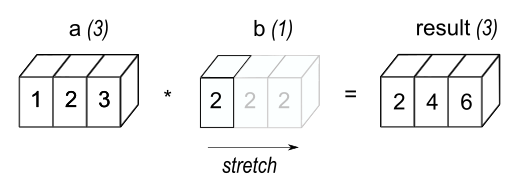

In [79]:
a = np.array([1,2,3]) * 2
a

array([2, 4, 6])

In [80]:
arr1 =np.array([[1,2],[3,4]])
arr2 =np.array([2,3])#esto no es lo mismo que arr3

arr3 =np.array([[2],[3]])
arr4 =np.array([[1,2],[3,4],[5,6]])

arr2.shape
arr3.shape
arr4.shape

arr1 + arr3

(2,)

(2, 1)

(3, 2)

array([[3, 4],
       [6, 7]])

### Ejemplo de propagación cuando una de las dimensiones es 1



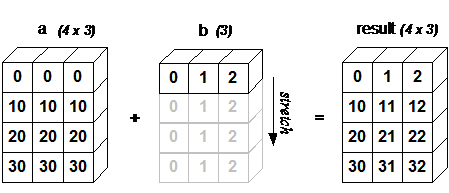


In [81]:
a = np.array([[0,0,0],[10,10,10],[20,20,20],[30,30,30]])
b = np.array([0,1,2])
c = np.array([0],[1],[3])
b.shape #when there only on value on the shape python justifies the number tho the right like this
# (4,3)
# (-,3)


a + b
#a + c

TypeError: array() takes from 1 to 2 positional arguments but 3 were given

#### Ejemplo con arreglos de 4 y 3 dimensiones:

A(4d array)            8 x  1 x  6 x  1

B(3d array)                 7 x  1 x  5 

Result(4d array)       8 x  7 x  6 x  5

+ Note que se colocan alineadas a la derecha


In [ ]:
arr1 = np.ones(shape =(3,1,3,1))
arr2 = np.ones(shape =(1,3))
arr3 = np.array([[2],[3],[4]])

#a + b + c

ValueError: operands could not be broadcast together with shapes (4,3) (5,) 

In [ ]:
np.ones?

Signature: np.ones(shape, dtype=None, order='C', *, like=None)
Docstring:
Return a new array of given shape and type, filled with ones.

Parameters
----------
shape : int or sequence of ints
    Shape of the new array, e.g., ``(2, 3)`` or ``2``.
dtype : data-type, optional
    The desired data-type for the array, e.g., `numpy.int8`.  Default is
    `numpy.float64`.
order : {'C', 'F'}, optional, default: C
    Whether to store multi-dimensional data in row-major
    (C-style) or column-major (Fortran-style) order in
    memory.
like : array_like, optional
    Reference object to allow the creation of arrays which are not
    NumPy arrays. If an array-like passed in as ``like`` supports
    the ``__array_function__`` protocol, the result will be defined
    by it. In this case, it ensures the creation of an array object
    compatible with that passed in via this argument.

    .. versionadded:: 1.20.0

Returns
-------
out : ndarray
    Array of ones with the given shape, dtype, and orde

In [ ]:
A = np.ones((8,1,6,1)) * 2
B = np.ones((7,1,5)) * 3
(A + B ).shape

(8, 7, 6, 5)

In [ ]:
try:
    A = np.ones((8,2,6,1)) * 2
    B = np.ones((7,1,5)) * 3
    (A + B ).shape
except Exception as e:
    print(e)

operands could not be broadcast together with shapes (8,2,6,1) (7,1,5) 


#### Ejemplo con arreglos de forma (4,1) y (3,):



In [ ]:
a1 = np.array([[0],[10],[20],[30]])
a1.shape

(4, 1)

In [ ]:
a2 = np.array([0,1,2])
a2.shape

(3,)

In [ ]:
a1 + a2

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

### Ejemplos de transmisiones (propagaciones) válidas y no válidas

In [ ]:
x = np.arange(4) 
x

array([0, 1, 2, 3])

In [ ]:
y = np.arange(3)
y

array([0, 1, 2])

In [ ]:

try:
    x.shape
    y.shape
    x + y
except ValueError as e:
    print(e)


(4,)

(3,)

operands could not be broadcast together with shapes (4,) (3,) 


### 13.3 Suma dos elementos en un arreglo de una dimensión

In [37]:
# Suma dos elementos en un arreglo de una dimensión
arr1 = np.array([1, 2, 3, 4])
suma = arr1[2] + arr1[3]
print(f'La suma es {suma} y el arreglo tiene dimensión {arr1.ndim}')

La suma es 7 y el arreglo tiene dimensión 1


In [38]:
# Las operaciones NumPy generalmente se realizan en pares de arreglos elemento por elemento. 
# En el caso más simple, las dos matrices deben tener exactamente la misma forma
a = np.array([1,3,5,7,9]) 
b = np.array([3,5,6,7,9])
c = a + b
c

array([ 4,  8, 11, 14, 18])

In [39]:
a + 2 # propagación

array([ 3,  5,  7,  9, 11])

In [40]:
arr = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])

In [41]:
arr + 2 # Se propaga en las dos filas

array([[ 3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12]])

### Cambiar la forma (shape) de una matriz sin cambiar sus datos con reshape()

np.reshape(a, nueva forma, orden='C')

Da una nueva forma a un arreglo sin cambiar sus datos.

In [42]:
#np.reshape?

In [43]:
a3 = np.array([1,2,3,4,5,6,7,8,9,10])
a3.shape

(10,)

In [44]:

a3.reshape(5,2)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [45]:
a3.reshape(2,5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [46]:
a3.reshape(2,6)

ValueError: cannot reshape array of size 10 into shape (2,6)

In [ ]:
a3.reshape(2,4)

ValueError: cannot reshape array of size 10 into shape (2,4)

In [ ]:
a3.reshape(1,10)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [ ]:
x
x.shape

array([0, 1, 2, 3])

(4,)

In [ ]:
xx = x.reshape(4,1)
xx
xx.shape

array([[0],
       [1],
       [2],
       [3]])

(4, 1)

In [ ]:
y = np.ones(5)
y

array([1., 1., 1., 1., 1.])

In [ ]:
xx.shape, y.shape
print(xx +y)
(xx + y).shape

((4, 1), (5,))

[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]


(4, 5)

In [ ]:
z = np.ones((3,4))
z

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [ ]:
x, x.shape, z, z.shape

(x + z).shape

x + z


(array([0, 1, 2, 3]),
 (4,),
 array([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]),
 (3, 4))

(3, 4)

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

La transmisión proporciona una forma conveniente de tomar el producto externo (o cualquier otra operación externa) de dos arreglos. El siguiente ejemplo muestra una operación de suma externa de dos matrices 1-d.


## 14. Multiplicación con matrices en numpy 

Ver blog https://www.codingem.com/numpy-at-operator/

+ Recuerde que el número de columnas de la primera matriz debe ser igual al número de filas de las segunda matriz


In [ ]:
d = np.array([0, 9, 2, 3, 4])
d, d.shape, d.ndim

(array([0, 9, 2, 3, 4]), (5,), 1)

### 14.1 Multilicación de arreglo por un escalar

In [ ]:
# Se multiplica un escalar por un arreglo: se "propaga" el escalar

d = a * 2
d

array([ 2,  6, 10, 14, 18])

### Caso de aplicación: escalar el color de una imagen

Ver notebook arreglo3d_imagenes_numpy.ipynb

Si tiene un arreglo de valores RGB de 256 x 256 x 3 y desea escalar cada color de la imagen por un valor diferente, puede multiplicar la imagen por una matriz unidimensional con 3 valores. Alinear los tamaños de los ejes posteriores de estas matrices de acuerdo con la regla de transmisión muestra que son compatibles.

Image         (3d array) 256 x 256 x __3__

Scale         (1d array)             __3__

Result        (3d array) 256 x 256 x __3__

### 14.2 Multilicación de arreglo por otro arreglo con operador @

Para más detalle puede ver https://www.codingem.com/numpy-at-operator/

In [ ]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
product = A @ B
print(product)

[[19 22]
 [43 50]]


In [ ]:
x= np.array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [ ]:
arr0 = np.array(42)

In [ ]:
x.shape, arr0.shape

((2, 3, 1), ())

In [ ]:
try:
    x @ arr0  # Arroja error porque no pueden multiplicarse
except ValueError as e:
    print(e)
    

matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)


### Filtrado (subarreglos resultantes) con condición en los corchetes

**Ejercicio. Extraer números impares**

+ Colocar condición en los corchetes

In [ ]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
impares=arr[arr%2 == 1]
print(impares)

[1 3 5 7 9]


## 15. Producto interior (inner product)

### 15.1 Producto punto (dot product)

## 16. Producto exterior (outer product) o producto tensorial

En álgebra lineal, el producto exterior de dos vectores de coordenadas es una matriz. 

+ Si los **dos vectores** tienen dimensiones **n** y **m**, entonces su **producto exterior** es una **matriz n × m**. 

Su signature en numpy:

    numpy.outer(a, b, out=None)

    a(M,) como un arreglo
    Primer vector de entrada. La entrada se aplana si aún no es unidimensional.

    b(N,) tipo_arreglo
    Segundo vector de entrada. La entrada se aplana si aún no es unidimensional.

    out(M, N) ndarray, opcional
    Una ubicación donde se almacena el resultado.


+ De manera más general, **dados dos tensores** (matrices multidimensionales de números), **su producto exterior es un tensor**. 
    + El **producto exterior de los tensores** también se conoce como su **producto tensorial** y se puede utilizar para definir el álgebra tensorial.
    
**El producto exterior contrasta con**:

+ El producto punto (**dot product**), que es un caso especial de "producto interno" (**inner product**), que toma un par de vectores de coordenadas como entrada y produce un escalar.

+ El producto de Kronecker, que toma un par de matrices como entrada y produce una matriz de bloques

+ La multiplicación de matrices estándar

In [ ]:
a,b

(array([1, 3, 5, 7, 9]), array([3, 5, 6, 7, 9]))

In [ ]:
# Outer product
np.outer(a, b, out=None)  # Es lo mismo que out[i, j] = a[i] * b[j]

array([[ 3,  5,  6,  7,  9],
       [ 9, 15, 18, 21, 27],
       [15, 25, 30, 35, 45],
       [21, 35, 42, 49, 63],
       [27, 45, 54, 63, 81]])

In [ ]:
np.outer(a, b, out=None) == a * b

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True]])

In [ ]:
a * b # se multiplica a por b, elemento por elemento

array([ 3, 15, 30, 49, 81])

In [ ]:
a.shape, b.shape

((5,), (5,))

In [ ]:
a @ b # Esta es una multiplicación de dos vectores (arreglos de una dimensión)

178

In [ ]:
a1 = np.array([[ 0.0,  0.0,  0.0],
           [10.0, 10.0, 10.0],
           [20.0, 20.0, 20.0],
           [30.0, 30.0, 30.0]])
b1 = np.array([1.0, 2.0, 3.0])
a1 + b1

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

### Comparar eficiencia de multiplicar y agregar a una lista vs usar operación vectorizada

In [ ]:
a = np.array(range(10000)) 
b = np.array(range(10000))
c = []

#start = time.process_time()
start = datetime.now()
# bloque de código para medir tiempo    
for i in range(len(a)):
    c.append(a[i]*b[i])
end = datetime.now()
print((end - start)) # de tipo timedelta

0:00:00.006981


In [ ]:
type(start)

datetime.datetime

In [ ]:
c

[0,
 1,
 4,
 9,
 16,
 25,
 36,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289,
 324,
 361,
 400,
 441,
 484,
 529,
 576,
 625,
 676,
 729,
 784,
 841,
 900,
 961,
 1024,
 1089,
 1156,
 1225,
 1296,
 1369,
 1444,
 1521,
 1600,
 1681,
 1764,
 1849,
 1936,
 2025,
 2116,
 2209,
 2304,
 2401,
 2500,
 2601,
 2704,
 2809,
 2916,
 3025,
 3136,
 3249,
 3364,
 3481,
 3600,
 3721,
 3844,
 3969,
 4096,
 4225,
 4356,
 4489,
 4624,
 4761,
 4900,
 5041,
 5184,
 5329,
 5476,
 5625,
 5776,
 5929,
 6084,
 6241,
 6400,
 6561,
 6724,
 6889,
 7056,
 7225,
 7396,
 7569,
 7744,
 7921,
 8100,
 8281,
 8464,
 8649,
 8836,
 9025,
 9216,
 9409,
 9604,
 9801,
 10000,
 10201,
 10404,
 10609,
 10816,
 11025,
 11236,
 11449,
 11664,
 11881,
 12100,
 12321,
 12544,
 12769,
 12996,
 13225,
 13456,
 13689,
 13924,
 14161,
 14400,
 14641,
 14884,
 15129,
 15376,
 15625,
 15876,
 16129,
 16384,
 16641,
 16900,
 17161,
 17424,
 17689,
 17956,
 18225,
 18496,
 18769,
 19044,
 19321,
 19600,
 19881,
 20164,
 2

In [ ]:
len(c)

10000

In [ ]:
c[10000-1]

99980001

Esto produce la respuesta correcta, pero si a y b contienen millones de números cada uno, pagaremos el precio por las ineficiencias de los bucles en Python.

NumPy nos da lo mejor de ambos mundos: las __operaciones vectorizadas elemento por elemento__ son el "modo predeterminado" cuando se trata de un ndarray. En NumPy:

In [ ]:
# Operación vectorizada
start = datetime.now()
d = a * b
end = datetime.now()

print ('La operación tomó:{}'.format(end - start))

La operación tomó:0:00:00


In [ ]:
c == d

array([ True,  True,  True, ...,  True,  True,  True])

In [ ]:
d[10000-1]

99980001

Con muchos datos puede aparecer un Warning como:

RuntimeWarning: overflow encountered in long_scalars

### Posible solución:

Este error suele surgir porque el tipo de datos que está utilizando no puede manejar el tamaño del número que está intentando manipular. Por ejemplo, el número más grande que puede manipular con int32 es 2147483647.
Dependiendo del tamaño de los números con los que esté tratando, configurar el tipo de datos en int64 o float64 __podría__ resolver el problema. P.ej. a continuación se convierte mi_lista a un arreglo de flotantes de 64 bits:


In [ ]:
mi_lista =[4.2,3.33,234567891111.67]
type(mi_lista[2])

float

In [ ]:
numpy_array = np.array (mi_lista, dtype = np.float64)
type(numpy_array[2]), numpy_array

(numpy.float64, array([4.20000000e+00, 3.33000000e+00, 2.34567891e+11]))

### Conversión a fecha en formato de cadena y con estándard ISO y con los microsegundos

In [ ]:
from datetime import date
date.isoformat?

In [ ]:
start = datetime.now().isoformat(timespec='microseconds')

start
# '2021-02-18T12:44:04.392368'


'2022-09-27T07:58:20.712888'

In [ ]:
datetime.now().isoformat()

'2022-09-27T08:03:52.405476'

In [ ]:
type(start)

numpy.datetime64

### Conversión de la cadena en format de fecha ISO al tipo datetime64 que se puede emplear para restar dos tiempos

In [ ]:
start = np.datetime64('2021-02-18T12:44:04.392368')
start

numpy.datetime64('2021-02-18T12:44:04.392368')

In [ ]:
a = np.array(range(10000)) 
b = np.array(range(10000))
c = []

start = datetime.now().isoformat(timespec='microseconds')
start = np.datetime64(start)
# bloque de código para medir tiempo    
for i in range(len(a)):
    c.append(a[i]*b[i])
end = datetime.now().isoformat(timespec='microseconds')
end = np.datetime64(end)
print((end - start)) # La respuesta es el total de microsegundos

7979 microseconds


In [ ]:
a = np.array(range(100000)) 
b = np.array(range(100000))
c = []

#start = time.process_time()
start = datetime.now()
# bloque de código para medir tiempo    
for i in range(len(a)):
    c.append(a[i]*b[i])
end = datetime.now()
print((end - start)) # de tipo timedelta

0:00:00.112881


C:\Users\ghernand\AppData\Local\Temp\ipykernel_19820\164564047.py:9: RuntimeWarning: overflow encountered in long_scalars
  c.append(a[i]*b[i])


## Funciones universales

Una **función universal** (`ufunc` para abreviar) es una función que:

+ Opera en ndarrays elemento por elemento, 
+ Admite "broadcasting" de arreglos,
+ Admite la conversión de tipos y varias otras características estándar. 
+ Es un contenedor "vectorizado" para una función que toma un número fijo de entradas específicas y produce un número fijo de salidas específicas.

Para profundizar en este tema: [ https://docs.scipy.org/doc/numpy/reference/ufuncs.html ] Ver listado de ufun()

Incluye funciones para operaciones matemáticas diversas, trigonometría, operaciones de bit y de comparación.

numpy.ufunc()

Actualmente hay más de 60 funciones universales definidas en numpy en uno o más tipos, que cubren una amplia variedad de operaciones. Algunos de estos ufuncs se llaman automáticamente en arreglos cuando se usa la notación infija (por ejemplo, add(a, b) se llama internamente cuando se escribe a + b y a o b es un ndarray).

## Funciones para sumar y obtener estadísticas descriptivas

In [ ]:
d.sum() #suma de los elementos del arreglo

-1724114088

In [ ]:
d.mean() #media de los elementos del arreglo

33328333.5

In [ ]:
d.std() #desviación estándar

29811444.437432263

In [ ]:
d.max() #máximo

99980001

In [ ]:
d.min() #mínimo

0

## Valores booleanos y evaluación de números en condicionales

In [ ]:
1 == True

True

In [ ]:
2 == True

False

In [ ]:
if 4 : 
    print('No es cero')

No es cero


In [ ]:
0 == True

False

In [ ]:
matriz_bool =np.ones((3,3),dtype=bool)
matriz_bool

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [ ]:
matriz_bool.dtype

dtype('bool')

In [ ]:
nuevo = np.array([0. , 3.6, 0.8, 1.2, 1.6])

In [ ]:
nuevo.all() #devuelve True si todos los elementos se evalúan a verdadero

False

In [ ]:
np.array([1,1,1]).all()

True

In [ ]:
nuevo.any() #devuelve True si cualquiera de los elementos se evalúa como verdadero

True

In [ ]:
np.array([0,0,0]).all()

False

In [ ]:
nuevo

array([0. , 3.6, 0.8, 1.2, 1.6])

In [ ]:
nuevo.nonzero() #retorna los índices de los elementos que no son ceros

(array([1, 2, 3, 4], dtype=int64),)

In [ ]:
a=np.array([1,0,1])
a.nonzero()     #retorna los índices de los elementos que no son ceros

(array([0, 2], dtype=int64),)

In [ ]:
a = np.array([1,2,3],float) 
b = np.array([5,2,6],float) 
a + b 

array([6., 4., 9.])

## Más operaciones vectorizadas

In [ ]:
a - b

array([-4.,  0., -3.])

In [ ]:
a * b 

array([ 5.,  4., 18.])

In [ ]:
b / a 

array([5., 1., 2.])

In [ ]:
a % b 

array([1., 0., 3.])

In [ ]:
b ** a 

array([  5.,   4., 216.])

In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]], float) 
b = np.array([-1, 3], float) 
a 

array([[1., 2.],
       [3., 4.],
       [5., 6.]])

In [ ]:
b 

array([-1.,  3.])

In [ ]:
a + b 

array([[0., 5.],
       [2., 7.],
       [4., 9.]])

### Funciones trigonométricas

In [ ]:
#np.sin?

In [ ]:
#np.degrees?

In [ ]:
f = np.sin(x) # Devuelve un nuevo arreglo con el valor del seno de cada elemento de x en radianes
f
np.degrees(f) # Convierte 'angulos de radianes a grados

array([0.        , 0.84147098, 0.90929743, 0.14112001])

array([ 0.        , 48.21273601, 52.09890488,  8.08558087])

### Adición externa (outer adition)

In [ ]:
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
a[:, np.newaxis] + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

La mayoría de los métodos tienen funciones equivalentes

In [ ]:
nuevo.sum() 
np.sum(nuevo) 

7.200000000000001

7.200000000000001

## Iteraciones en arreglos

+ Se puede realizar de forma tradicional con estructuras de repetición como el for
+ El iterador de objetos **nditer()** proporciona muchas formas flexibles de visitar todos los elementos de uno o más arreglos de forma sistemática.
+ Para profundizar en este tema vea: https://numpy.org/doc/stable/reference/arrays.nditer.html

In [ ]:
a = np.arange(6).reshape(2,3)
for x in np.nditer(a):
    print(x, end=' ')

0 1 2 3 4 5 

### Orden del recorrido

Hay momentos en los que es importante visitar los elementos de un arreglo en un orden específico, independientemente de la disposición de los elementos en la memoria. El objeto **nditer** proporciona un parámetro de orden para controlar este aspecto de la iteración. El valor predeterminado, que tiene el comportamiento descrito anteriormente, es order='K' para mantener el orden existente. Esto se puede anular con order='C' para orden C y order='F' para orden Fortran.

In [ ]:
a = np.arange(6).reshape(2,3)
print('Orden F')
for x in np.nditer(a, order='F'):
    print(x, end=' ')

print('\nOrdenC')
for x in np.nditer(a, order='C'):
    print(x, end=' ')


Orden F
0 3 1 4 2 5 
OrdenC
0 1 2 3 4 5 

### Permitir modificaciones

De forma predeterminada, se trata el operando de entrada como un objeto de solo lectura. Para poder modificar los elementos del arreglo, debe especificar el modo de lectura-escritura o de solo escritura usando los indicadores por operando "lectura-escritura" o "solo-escritura".

El nditer lo hará

In [ ]:
a = np.arange(6).reshape(2,3)
a

with np.nditer(a, op_flags=['readwrite']) as it:
    for x in it:
        x[...] = 2 * x

a

array([[0, 1, 2],
       [3, 4, 5]])

array([[ 0,  2,  4],
       [ 6,  8, 10]])

In [ ]:
# El arreglo es un iterable y se puede usar un ciclo for
arr1 = np.array([1,2,3])
for i in arr1:
    print(i)

1
2
3


In [ ]:
# En arreglo 2D note que no se imprimen comas
arr2 = np.array([[1,2,3], [4,5,6]])
for i in arr2:
    print(i)

[1 2 3]
[4 5 6]


In [ ]:
# En lista 2D noten que se imprimen comas
lis2 = [[1,2,3], [4,5,6]]
for i in lis2:
    print(i)

[1, 2, 3]
[4, 5, 6]


In [ ]:
for i in arr2:
    for j in i:
        print(j)

1
2
3
4
5
6


In [ ]:
arr2D = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr2D
arr2D.shape
for x in arr2D:
    print("x represents the 2-D array:")
    print(x)

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

(2, 2, 3)

x represents the 2-D array:
[[1 2 3]
 [4 5 6]]
x represents the 2-D array:
[[ 7  8  9]
 [10 11 12]]


In [ ]:
 
arreglo = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arreglo.shape
# 2 veces matriz de 2 x 3   

(2, 2, 3)

In [ ]:
# Observar que opera elemento a elemento sin hacer for anidados
for i in np.nditer(arreglo):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
for i in arreglo: 
    for j in i:
        for k in j:
            print(k)

1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
for j in range(len(arreglo[0])): 
    for i in range(len(arreglo[0])):
        print(arreglo[0][j][i])

1
2
4
5


In [ ]:

arreglo.reshape(12,1)


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12]])

In [ ]:
arreglo2 = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
for i in arreglo2: 
    print("i representa el arreglo 2-D siguiente:")
    print(i)

i representa el arreglo 2-D siguiente:
[[1 2 3]
 [4 5 6]]
i representa el arreglo 2-D siguiente:
[[ 7  8  9]
 [10 11 12]]


## Ejercicio 1

Invertir el orden de las filas de la matriz a = np.array([[1, 2], [3, 4], [5, 6]], float) 


In [ ]:
a

array([[ 0,  2,  4],
       [ 6,  8, 10]])

In [ ]:
a[::-1]  #invierte el orden de las filas

array([[ 6,  8, 10],
       [ 0,  2,  4]])

## Ejercicio 2


Invertir las filas y las columnas de la matriz a = np.array([[1, 2], [3, 4], [5, 6]], float) 

In [ ]:
a = np.array([[1, 2], [3, 4], [5, 6]], float)

In [ ]:
a.T

array([[1., 3., 5.],
       [2., 4., 6.]])

In [ ]:
np.flipud(a)

array([[5., 6.],
       [3., 4.],
       [1., 2.]])

## Ejercicio 3

Mostrar el último elemento de la matriz a = np.array([[1, 2], [3, 4], [5, 6]], float) 

In [ ]:
a[-1]  #muestra el último elemento (fila)

array([5., 6.])

In [ ]:
a[-1,-1]

6.0

## Ejercicio 4

Mostrar todas las filas de la matriz a = np.array([[1, 2], [3, 4], [5, 6]], float) , excepto la última

In [ ]:
a[:-1]  #muestra todos los elementos excepto el último

array([[1., 2.],
       [3., 4.]])

## Ejercicio 5

Invertir filas y columnas de la matriz a = np.array([[1, 2], [3, 4], [5, 6]], float) , excepto la última

In [ ]:
a[::-1,::-1 ]  #invierte filas y columnas

array([[6., 5.],
       [4., 3.],
       [2., 1.]])

In [ ]:
a[:-1,:-1 ]

array([[1.],
       [3.]])

## Ejercicio 6

Invertir las columnas de la matriz a = np.array([[1, 2], [3, 4], [5, 6]], float) , excepto la última

In [ ]:
a[::,::-1]  #invierte las columnas

array([[2., 1.],
       [4., 3.],
       [6., 5.]])

## Valores perdidos o faltantes y valores infinitos en arreglos de numpy

Suponga que termina el semestre y tengo en una matriz las evaluaciones de mis 3 alumnos de maestría, donde las filas representan a los alumnos y las columnas las evaluaciones. Algunos alumnos no presentaron exámenes o tareas. Los arreglos de numpy permiten colocar los valores perdidos o faltantes con np.nan 

La matriz pudiera ser la siguiente:

In [ ]:
eval_msc=np.array([[100,np.nan,90,100], [94,95,90,100],[np.nan,np.nan,70,80]])
eval_msc

array([[100.,  nan,  90., 100.],
       [ 94.,  95.,  90., 100.],
       [ nan,  nan,  70.,  80.]])

In [ ]:
# Repasando reshape
eval_r=eval_msc.reshape(4,3)  #el nuevo arreglo tiene recorridos los elementos
eval_r

array([[100.,  nan,  90.],
       [100.,  94.,  95.],
       [ 90., 100.,  nan],
       [ nan,  70.,  80.]])

In [ ]:
# Repasando flatten
eval_r.flatten() #lo convierte a una sola dimensión

array([100.,  nan,  90., 100.,  94.,  95.,  90., 100.,  nan,  nan,  70.,
        80.])

In [ ]:
# Ejemplo con valores infinitos
arr_inf = np.array([1, 0, np.nan, np.inf])
print("Arreglo original")
print(arr_inf)
print("prueba elemento por elemento si es o no infinito:")
print(np.isinf(arr_inf))

Arreglo original
[ 1.  0. nan inf]
prueba elemento por elemento si es o no infinito:
[False False False  True]


### Otras operaciones con arreglos: tile() y repeat()

In [ ]:
a=[1,2,3]  # Repite la secuencia completa dos veces
np.tile(a,2)

array([1, 2, 3, 1, 2, 3])

In [ ]:
np.repeat(a,3) # Repite cada elemento de la secuencia 3 veces

array([1, 1, 1, 2, 2, 2, 3, 3, 3])

## Generación de números aleatorios

https://www.machinelearningplus.com/python/numpy-tutorial-part1-array-python-examples/

In [ ]:
# Números aleatorios entre [0,1) de la forma 2,2
rand()
print(np.random.rand(2,2))

[[0.56839468 0.06200513]
 [0.55972766 0.43537916]]


In [ ]:
# Distribución Normal con media 0  (mean=0) y varianza 1 (variance=1) de la forma 2,2
# randn()
print(np.random.randn(2,2))

[[ 0.44108349 -0.41700914]
 [-1.05687898  0.98659964]]


In [ ]:
# enteros aleatorios entre [0, 10) de la forma 2,2
print(np.random.randint(0, 10, size=[2,2]))

[[5 7]
 [5 0]]


In [ ]:
# Un número aleatorio entre [0,1)
print(np.random.random())

0.5115039650840341


In [ ]:
# Números aleatorios entre [0,1) - no incluye al 0, pero sí al 1 de la forma 2,2
print(np.random.random(size=[2,2]))

[[0.25347781 0.17241177]
 [0.08575887 0.54659635]]


In [ ]:
# Selecciona 10 elementos de una lista, con igual probabilidad, o sea, hay reemplazo
print(np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10))  

['i' 'o' 'a' 'u' 'u' 'u' 'i' 'i' 'a' 'e']


In [ ]:
# Selecciona 10 elementos de una lista con una probabilidad predefinida 'p'
print(np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10, p=[0.3, .1, 0.1, 0.4, 0.1]))  # habrá más oes?

['a' 'o' 'o' 'o' 'a' 'o' 'u' 'a' 'o' 'o']


## Uso de seed()

Si desea **repetir el mismo conjunto de números aleatorios cada vez**, debe establecer la **semilla** (*seed*) o el estado aleatorio. La semilla puede ser cualquier valor. El único requisito es que debe establecer la semilla en el mismo valor cada vez que desee generar el mismo conjunto de números aleatorios.

In [ ]:
# Crear el random state
rn = np.random.RandomState(100)

# Crear números aleatorios entre [0,1) de la forma 2,2
print(rn.rand(2,2))

[[0.54340494 0.27836939]
 [0.42451759 0.84477613]]


In [ ]:
# Fiajt la semilla aleatoria
np.random.seed(100)

# Crear números aleatorios entre [0,1) con la forma 2,2
print(np.random.rand(2,2))

[[0.54340494 0.27836939]
 [0.42451759 0.84477613]]


Observe que se generan los mismos números

In [ ]:
# Crear arreglo de enteros aleatorios de tamaño 10 entre [0,10)  - el 10 está excluido
np.random.seed(100)
arr_rand = np.random.randint(0, 10, size=10)
print(arr_rand)

[8 8 3 7 7 0 4 2 5 2]


## Valores únicos

In [ ]:
# Obtener los números únicos y contarlos
uniqs, counts = np.unique(arr_rand, return_counts=True)
print("Unique items : ", uniqs)
print("Counts       : ", counts)

Unique items :  [0 2 3 4 5 7 8]
Counts       :  [1 2 1 1 1 2 2]


## Aplanado con ravel()

numpy.ravel(a, orden='C')

Devuelve un arreglo aplanado contiguo.

Se devuelve un arreglo 1-D que contiene los elementos de la entrada. Se hace una copia sólo si es necesario.

In [ ]:
x1 = np.array([[1, 3, 5], [11, 35, 56]])  
y1=np.ravel(x1) 
y1

## flat y flatten

+ flat es un atributo. 
+ ndarray.flat un iterador 1-D sobre el arreglo

+ flatten es un método
+ ndarray.flatten(order='C') retorna una copia del arrelo colapsada en una dimensión.

In [ ]:
a = np.array([[1,2], [3,4]])
a.flatten(), a.flatten().shape

a.flatten('F'), a.flatten().shape



In [ ]:
a.flat

In [ ]:
for i in a.flat:
    print(i) 

In [ ]:
arreglo2 = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

arreglo2.flatten(), arreglo2.flatten().shape

arreglo2.flatten('F'), arreglo2.flatten().shape

